This code computes Equivalent Clean Air (ECA) flow rate, also knwon as clean air delivery rate (CADR), using two different approaches.



1.   Log-linear approach
2.   Integral approach


First, we load all the neccessary Python libraries for the analysis and calcualtion. the followings are the python libraries used for this code.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy.stats import ttest_1samp
from scipy.stats import wilcoxon

Next, we have to import all concentrations measured alongside its corresponding measurment errors, either manually or through importing an external file.

In the following setion, 8 different cases are provided as examples of concentration dataset. The examples used are as follows:




*   Case #1: Non-biological particle by Zeng et al. [link](https://built-envi.com/wp-content/uploads/IIT-CADR-Testing-WINIX-5500-2-October-2021.pdf).

*   Case #2: Hypothetical E. Coli by Stephens et al. [link](https://www.ashrae.org/file%20library/technical%20resources/covid-19/20-31_stephens.pdf).

*   Case #3: High res. VOC (formaldehyde) by Schumacher [doi](https://doi.org/10.3390/atmos15010109)

*   Case #4: Low res. VOC (formaldehyde) by Law et al. [doi](https://doi.org/10.1016/j.buildenv.2024.111823)

*   Case #5-7: Bacteriophage MS2 by Ratliff et al. [doi](https://doi.org/10.1016/j.buildenv.2022.109804)



*   Case #8: UVGI test by Lin et al. [doi](https://doi.org/10.1080/02786826.2017.1280128)











# ***Case #1: Real non-biological particles: Smoke (Truncated dataset)***

In [ ]:

t_t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])                    # Time points

t_c = np.array([0, 1,	2, 3,	4, 5,	6, 7, 8, 9, 10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,	21])                    # Time points



c_control = np.array([46629.5822,	45262.5924,	38944.8016,	41968.5662,	39470.0741,
                   35389.2249,	37112.7987,	34422.0024,	33845.9813,	31813.524,
                   30782.9434,	29226.4405,	27259.9242,	27281.7278,	26790.9496,
                   25085.1379,	22133.3491,	22427.7312,	21338.2308,	18838.1459,
                   19229.6865,	19123.3036])                                    # Test concentrations (Ideal hypothetical first order)

c_control=np.log10(c_control)

c_test = np.array([20733.1887, 17199.744, 15496.7706, 13660.3969, 11310.3118,
                     10883.8787, 9122.8056, 8170.2825, 6648.0319, 6299.9989,
                     4945.4016, 4635.3165, 3815.3086,3194.0609, 2984.6603,
                     2455.5343, 2276.8268, 1918.0086, 1619.6262, 1389.2609,
                     1244.1919, 1231.9916])                                     # Control concentrations (Ideal hypothetical first order)
c_test=np.log10(c_test)


sigma_control = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0.])

sigma_test = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])



c_bg_test=113.7572667                                                           # If there is no background concentration, set to 0
c_bg_control=607.22006143
#c_bg_test = np.log10(c_bg_test)
#c_bg_control = np.log10(c_bg_control)

V = 1296.048                                                                    # Chamber volume (ft3) (Ideal hypothetical first order)
#V = 36.7                                                                       # Chamber volume (m3) (Ideal hypothetical first order)

# ***Case #1: Real non-biological particles: Smoke (full dataset)***

In [ ]:
t_c = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,	11,	12,	13,	14,	15,
                16,	17,	18,	19,	20,	21,	22,	23,	24,	25,	26,	27,	28,	29,	30,	31,
                32,	33,	34,	35,	36,	37,	38,	39,	40,	41,	42,	43,	44,	45,	46,	47,
                48,	49,	50,	51,	52,	53,	54,	55,	56,	57,	58,	59])                # Time points'''




t_t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])                    # Time points

c_control = np.array([46629.5822,	45262.5924,	38944.8016,	41968.5662,	39470.0741,
                   35389.2249,	37112.7987,	34422.0024,	33845.9813,	31813.524,
                   30782.9434,	29226.4405,	27259.9242,	27281.7278,	26790.9496,
                   25085.1379,	22133.3491,	22427.7312,	21338.2308,	18838.1459,
                   19229.6865,	19123.3036,	18965.1773,	17917.88,	16800.8839,
                   17120.304,	15590.7547,	15133.0791,	14335.7846,	14481.8507,
                   13082.9319,	13615.1729,	12671.266,	12284.8735,	12212.7403,
                   10803.6982,	10626.2898,	9913.9165,	9592.189,	9748.4621,
                   9832.5099,	8845.3218,	8723.0745,	8549.6231,	7938.6471,
                   7994.5961,	7957.8449,	7420.9003,	7394.3616,	6939.229,
                   6480.9155,	6413.2256,	6032.8,	6506.7329,	5738.9208,
                   5651.0126,	5511.8419,	5562.7665,	5061.1998,	5221.2187])   # Test concentrations (Ideal hypothetical first order)'''


c_control=np.log10(c_control)

c_test = np.array([20733.1887, 17199.744, 15496.7706, 13660.3969, 11310.3118,
                     10883.8787, 9122.8056, 8170.2825, 6648.0319, 6299.9989,
                     4945.4016, 4635.3165, 3815.3086,3194.0609, 2984.6603,
                     2455.5343, 2276.8268, 1918.0086, 1619.6262, 1389.2609,
                     1244.1919, 1231.9916])                                     # Control concentrations (Ideal hypothetical first order)
c_test=np.log10(c_test)

sigma_control = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0., 0., 0., 0.,
                          0., 0., 0., 0., 0., 0.])                              # Test standard deviations (Ideal hypothetical first order)


sigma_test = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0., 0., 0., 0., 0., 0.,
                       0., 0., 0., 0.])



c_bg_test=113.7572667                                                           # If there is no background concentration, set to 0
c_bg_control=607.22006143

#c_bg_test = np.log10(c_bg_test)
#c_bg_control = np.log10(c_bg_control)                                          # Control standard deviations (Ideal hypothetical first order)
V = 1296.048                                                                    # Chamber volume (ft3) (Ideal hypothetical first order)
#V = NA                                                                         # Chamber volume (m3) (Ideal hypothetical first order)

# ***Case #2: Hypothetical E.Coli***

In [2]:
t_c = np.array([0, 15, 30, 45, 60 ])                                            # Time points
t_t = np.array([0, 15, 30, 45, 60 ])                                            # Time points


c_test = np.array([5000, 2700, 1200, 400, 100])                                 # Test concentrations (Ideal hypothetical first order)
c_control = np.array([5000, 4200, 3000,2700, 2000])                             # Control concentrations (Ideal hypothetical first order)
c_test = np.log10(c_test)
c_control = np.log10(c_control)

c_bg_test=1                                                                     # If there is no background concentration, set to 0
c_bg_control=1
c_bg_test = np.log10(c_bg_test)
c_bg_control = np.log10(c_bg_control)


sigma_test = np.array([0,0,0,0,0])                                              # Test standard deviations (Ideal hypothetical first order)
sigma_control = np.array([0,0,0,0,0])                                           # Control standard deviations (Ideal hypothetical first order)
V = 500                                                                         # Chamber volume (ft3) (Ideal hypothetical first order)
#V = 14.2                                                                       # Chamber volume (m3) (Ideal hypothetical first order)

# ***Case #3: Real VOC (High Resolution) (Schumacher et. al. 2024)***

In [ ]:
# full dataset

t_c = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,
                21,	22,	23,	24,	25,	26,	27,	28,	29,	30,
                31, 32,	33,	34,	35,	36,	37,	38,	39,	40,
                41,	42,	43,	44,	45,	46,	47, 48,	49,	50,
                51,	52,	53,	54,	55,	56,	57,	58,	59, 60])                        # Time points

t_t = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20,
                21,	22,	23,	24,	25,	26,	27,	28,	29,	30,
                31, 32,	33,	34,	35,	36,	37,	38,	39,	40,
                41,	42,	43,	44,	45,	46,	47, 48,	49,	50,
                51,	52,	53,	54,	55,	56,	57,	58,	59, 60])                        # Time points



c_test = np.array([833.75, 761.28, 658.93, 567.20, 499.72, 451.38, 422.54,
377.29, 321.06, 295.83, 223.47, 192.89, 168.51, 180.00, 154.03, 117.60, 114.59,
94.81, 86.12, 74.05, 65.78, 61.08, 55.48, 51.09, 47.80, 43.67, 38.95, 35.24,
32.66, 30.53, 28.45, 26.76, 27.44, 29.12, 23.70, 24.67, 21.88, 19.60, 18.40,
17.51, 19.38, 19.07, 16.17, 14.67, 13.91, 13.55, 12.91, 12.21, 11.86, 12.43,
12.45, 12.32, 11.57, 11.21, 11.55, 10.61, 10.93, 11.39, 11.73, 11.32, 11.30 ])

c_test = np.log10(c_test)
c_control = np.array([929.45, 951.57, 923.26, 906.75, 912.08, 933.73, 915.11,
904.99, 891.02, 898.66, 899.28, 881.89, 880.40, 889.34, 888.76, 896.80, 891.25,
880.13, 870.49, 862.30, 862.03, 866.09, 874.08, 864.19, 880.57, 872.92, 861.04,
856.26, 862.26, 863.67, 843.84, 844.73, 842.50, 838.72, 844.15, 843.70, 855.47,
834.44, 830.98, 823.93, 822.37, 825.25, 848.16, 812.26, 885.45, 863.72, 826.80,
833.43, 822.13, 809.45, 806.02, 800.97, 801.26, 795.55, 836.46, 827.70, 785.76,
786.31, 786.06, 851.69, 837.34])                                                     # Control concentrations (Ideal hypothetical first order)

c_control = np.log10(c_control)
sigma_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0])                                                      # Test standard deviations (Ideal hypothetical first order)


sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0])                                                    # Test standard deviations (Ideal hypothetical first order)

c_bg_test=  0                                                                   # If there is no background concentration, set to 0
c_bg_control=0
#c_bg_test = np.log10(c_bg_test)
#c_bg_control = np.log10(c_bg_control)

V = 1034.72                                                                     # Chamber volume (ft3) (Ideal hypothetical first order)
#V = 29.3                                                                       # Chamber volume (m3) (Ideal hypothetical first order)

# ***Case #3: Real VOC (High Resolution) from 0 to 20 minutes (Schumacher et. al. 2024)***

In [ ]:
t_c = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20])                        # Time points

t_t = np.array([0, 1,	2,	3,	4,	5,	6,	7,	8,	9,	10,
                11,	12,	13,	14,	15, 16,	17,	18,	19,	20])                        # Time points



c_test = np.array([833.75, 761.28, 658.93, 567.20, 499.72, 451.38, 422.54,
377.29, 321.06, 295.83, 223.47, 192.89, 168.51, 180.00, 154.03, 117.60, 114.59,
94.81, 86.12, 74.05, 65.78])

c_test = np.log10(c_test)
c_control = np.array([929.45, 951.57, 923.26, 906.75, 912.08, 933.73, 915.11,
904.99, 891.02, 898.66, 899.28, 881.89, 880.40, 889.34, 888.76, 896.80, 891.25,
880.13, 870.49, 862.30, 862.03])                                                     # Control concentrations (Ideal hypothetical first order)

c_control = np.log10(c_control)
sigma_test = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])                                                      # Test standard deviations (Ideal hypothetical first order)


sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])                                                    # Test standard deviations (Ideal hypothetical first order)

c_bg_test=0                                                                    # If there is no background concentration, set to 0
c_bg_control=0
#c_bg_test = np.log10(c_bg_test)
#c_bg_control = np.log10(c_bg_control)

V = 1034.72                                                                     # Chamber volume (ft3) (Ideal hypothetical first order)
#V = 29.3                                                                       # Chamber volume (m3) (Ideal hypothetical first order)

# ***Case #4: Law et al 2024 (truncated dataset)***


In [ ]:
#0-40 minutes for control and 0-25 minutes for test

t_t = np.array([0, 5, 10, 15, 20, 25])                                          # Time points
t_c = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40 ])                             # Time points


c_test = np.array([0.958783047,	0.502557891,	0.40034575,
                   0.332838565,	0.301776099,	0.272451193])                     # Test concentrations

c_control = np.array([0.972665911, 0.969369171, 0.959128797, 0.959302774,
                      0.95947675, 0.950973937, 0.949412555, 0.940911944,
                      0.941083718])                                             # Control concentrations

sigma_test = np.array([0, 0, 0, 0, 0, 0 ])                                      # Test standard deviations
sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])                           # Control standard deviations

c_test = np.log10(c_test)
c_control=np.log10(c_control)


c_bg_test=0.24                                                                  # If there is no background concentration, set to 0
c_bg_control=0.65


V = 1059.44174                                                                                                                                          # Chamber volume (ft3)
#V = 30                                                                                                                                             # Chamber volume (m3)




# ***Case #4: Law et al 2024 (Full datset)***


In [ ]:
t_c = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])              # Time points
t_t = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])              # Time points


#0-60 minutes dataset (full dataset)

c_test = np.array([0.958783047, 0.502557891, 0.40034575, 0.332838565,
                   0.301776099, 0.272451193, 0.272625169, 0.251974851,
                   0.262558772, 0.262730546, 0.252494577, 0.252666351,
                   0.24242818 ])                                                # Test concentrations

c_test=np.log10(c_test)

c_control = np.array([0.972665911, 0.969369171, 0.959128797, 0.959302774,
                      0.95947675, 0.950973937, 0.949412555, 0.940911944,
                      0.941083718, 0.910021252, 0.910193026, 0.899954854,
                      0.901861986])                                             # Control concentrations

c_control=np.log10(c_control)

sigma_control = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])               # Control standard deviations
sigma_test    = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ])              # Test standard deviations


c_bg_test=0.24                                                                  # If there is no background concentration, set to 0
c_bg_control=0.65

V = 1059.44174                                                                  # Chamber volume (ft3)
#V = 30                                                                         # Chamber volume (m3)

# ***Case #5: Ratliff et al BPI***

In [13]:
t_c = np.array([0, 15, 30, 60, 90 ,120 ])                                  # Time points
t_t = np.array([0, 15, 30, 60, 90 ,120 ])                                  # Time points

c_test = np.array([8.4619, 7.6279, 7.2164, 6.2079, 5.8852, 5.6428 ])               # Test concentrations (Ratliff BPI)
c_control = np.array([8.4675, 7.6846, 7.1637, 7.0866, 6.2116, 6.1040])            # Control concentrations (Ratliff BPI)

sigma_test = np.array([0.23, 0.24 ,0.51 ,0.52 ,0.53 ,0.5])                 # Test standard deviations (ratliff values)
sigma_control = np.array([0.24 ,0.36, 0.39, 0.3, 0.36, 0.49])             # Control standard deviations (ratliff values)



c_bg_test=0                                                                     # If there is no background concentration, set to 0
c_bg_control=0


V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)


# ***Case #6: Ratliff et al PCO1***

In [10]:
t_c = np.array([0, 15, 30, 60, 90])                                             # Time points
t_t = np.array([0, 15, 30, 60, 90])                                             # Time points



c_test = np.array([ 8.11212724060371, 7.589987734, 6.745802232,
                   6.013936402, 5.394571206 ])                                  # Test concentrations

c_control = np.array([8.46745953764963, 7.684595602, 7.163725729,
                      7.086631702, 6.211568868])                                # Control concentrations


sigma_test = np.array([	0.108808569398572, 0.254108644,	0.169662969,
                       0.262771866,	0.047624259])                              # Test standard deviations

sigma_control = np.array([	0.237966029977382, 0.358965447,	0.393189888,
                          0.301479043,	0.361953917])                         # Control standard deviations



c_bg_test=0                                                                     # If there is no background concentration, set to 0
c_bg_control=0

V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# ***Case #7: Ratliff et al PCO2***

In [ ]:
t_c = np.array([0, 15, 30, 60, 90])                                             # Time points
t_t = np.array([0, 15, 30, 60, 90])                                             # Time points
c_test = np.array([8.032891171, 7.087704857, 6.424694684,
                   5.320557829, 4.709637767])                                   # Test concentrations

c_control = np.array([8.467459538, 7.684595602, 7.163725729,
                      7.086631702, 6.211568868])                                # Control concentrations

sigma_test = np.array([0.033101768,	0.029661622,	0.219839957,
                       0.117283171,	0.129724927])                               # Test standard deviations

sigma_control = np.array([0.23796603,	0.358965447,	0.393189888,
                          0.301479043,	0.361953917])                           # Control standard deviations



c_bg_test=0                                                                     # If there is no background concentration, set to 0
c_bg_control=0

V = 3000                                                                        # Chamber volume (ft3)
#V = 85                                                                         # Chamber volume (m3)

# Case #8: Lin et al 2017

In [ ]:
t_c = np.array([0, 10, 20, 30])                                                 # Time points (secs)
t_c =  t_c/60                                                                   # Time points (mins)
t_t = np.array([0, 10, 20, 30])                                                 # Time points (secs)
t_t =  t_t/60                                                                   # Time points (mins)

sf=np.array([1, 0.035, 0.023, 0.022])                                        # Survival fraction

c_test1 = np.array([177.8, 5.5, 3, 2])                                           # Test concentrations [PFU/L]
c_test = c_test1*1000                                                            # Test concentrations [PFU/m3]
c_test=np.log10(c_test)

c_control1 = c_test1/sf                                                           # Test concentrations [PFU/m3]
c_control = c_control1*1000
c_control=np.log10(c_control)


#sigma_test    = np.array([0, 0, 0, 0 ])                                # Test standard deviations [PFU/L]
sigma_test    = np.array([86400, 2200, 2600, 1500 ])                                # Test standard deviations [PFU/L]
#sigma_control = np.array([0, 0, 0, 0 ])                                             # Control standard deviations
sigma_control= np.array([86400, 1, 1, 1 ])/sf                                       # Control standard deviations

sigma_control=np.log10(sigma_control)
sigma_test=np.log10(sigma_test)

c_bg_test=0                                                                     # If there is no background concentration, set to 0
c_bg_control=0

V = 206                                                                         # Chamber volume (ft3)
#V = 5.8                                                                        # Chamber volume (m3)


# **Monte Carlo Analysis**


## 1.Log-linear method:


The loss rate in log-linear method  can be obtained using the following formula. The formula has been derived in a way that regression line always passes through zero.

<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
    });
  </script>
</head>
<body>
  <p>
    $$K = \frac{\sum_{i=0}^{np} t_i \ln\left(\frac{C_i-C_bg}{C_0-C_bg
    }\right)}{\sum_{i=0}^{np} t_i^2}$$
  </p>
</body>
</html>

Then, loss rates will be plugged into the CADR formula to obtain value for CADR

<!DOCTYPE html>
<html>
<head>
  <meta charset="UTF-8">
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <script type="text/x-mathjax-config">
    MathJax.Hub.Config({
      tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
    });
  </script>
</head>
<body>
  <p>
    $$CADR=V(K_{Test}-K_{Control})$$
  </p>
</body>
</html>

Original CADR value = 22.206634249885145 

Mean CADR value from Monte Carlo simulations = 22.206634249885152 

Standard deviation of CADR value from Monte Carlo simulations = 7.105427357601002e-15 

Error = 3.1996867592114955e-14% 



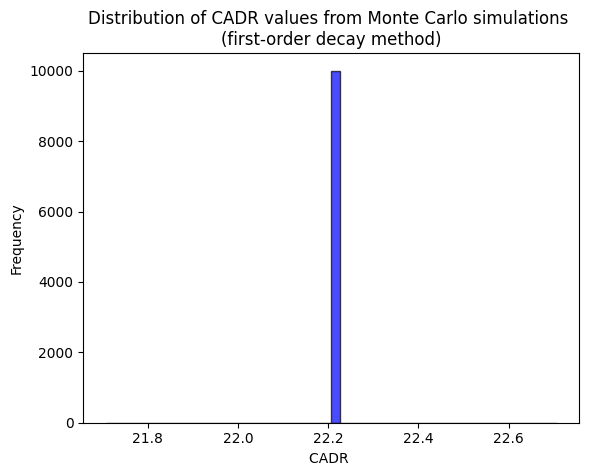

In [3]:
num_simulations = 10000

# Function to compute loss rate for either test or control
def compute_component(t, c, c_bg):

    #print((c / c[0]))
    ln_c_ratio = -np.log((10**c-c_bg) / (10**c[0]-c_bg))

    numerator = np.sum((t * ln_c_ratio) )
    denominator = np.sum((t ** 2) )

    return (numerator / denominator)

# Original CADR value
CADR_original = V * (compute_component(t_t, c_test, c_bg_test) - compute_component(t_c, c_control, c_bg_control))
print(f"Original CADR value = {CADR_original}","\n")


# Monte Carlo simulations
CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):
    c_test_simulated = np.random.normal((c_test), (sigma_test))
    c_control_simulated = np.random.normal((c_control),(sigma_control))

    CADR_values[i] = V * (compute_component(t_t, c_test_simulated, c_bg_test) - compute_component(t_c, c_control_simulated, c_bg_control))

# Calculate mean and standard deviation of CADR

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]

CADR_mean = np.mean(CADR_values)
CADR_std = np.std(CADR_values)

print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean}","\n")
print(f"Standard deviation of CADR value from Monte Carlo simulations = {CADR_std}","\n")
print(f"Error = {100*CADR_std/CADR_mean}%","\n")

# Plotting the distribution of CADR values

plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of CADR values from Monte Carlo simulations \n(first-order decay method)')
plt.xlabel('CADR ')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()


## 2.Intergral approach






The CADR base on the integral method can be calculated as follows:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>CADR Formula</title>
    <script type="text/javascript" async
      src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
    </script>
    <script type="text/x-mathjax-config">
      MathJax.Hub.Config({
        tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
      });
    </script>
</head>
<body>
    <div class="formula">
        $$ \text{CADR}_{\text{Integral}} = \frac{\text{V(C}_{\text{test}}(0)-\text{C}_{\text{last}})}{\int_{0}^{\text{t}_{\text{last}}} (C_{\text{test}}(t)-C_{bg, test}) \, dt} - \frac{\text{V(C}_{\text{control}}(0)-\text{C}_{\text{last}})}{\int_{0}^{\text{t}_{last}}( C_{\text{control}}(t)-C_{bg, control}) \, dt} $$
    </div>
</body>
</html>


 Where the integral in the denominator can be calculated using either trapezoidal or logarithmic trapezoidal method. here, we use logarithmic trapezoidal method which looks like the following:

 <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Integral Formula</title>
    <script type="text/javascript" async
      src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
    </script>
    <script type="text/x-mathjax-config">
      MathJax.Hub.Config({
        tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}
      });
    </script>
</head>
<body>
    <div class="formula">
        $$ \int_{0}^{\text{t}_{last}} C(t) \, dt = \sum_{n=1}^{\text{t}_{last}} \left( \frac{t_i - t_{i-1}}{\ln\left( \frac{C(t_{i-1})-C_{bg}}{C(t_i)-C_{bg}
        } \right)} \left( C(t_{i-1}) - C(t_i) \right) \right) $$
    </div>
</body>
</html>


###2.1. Log-Trapezoidal Method for numerical integration

test 0.11183915539670848
control 0.0953761433720592
Original CADR value = 49.38903607394784

Mean CADR value from Monte Carlo simulations = 41.21722224846365

Standard deviation of CADR value from Monte Carlo simulations = 170.04641363786155

Error = 412.5615564600546%



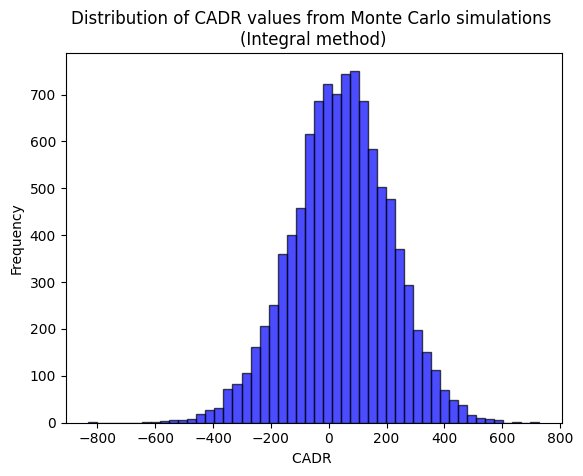

In [15]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 10000

# Function to compute the integral
def compute_integral(t, c, c_bg):
    N = len(t)
    integral_sum = 0.0

    for i in range(1, N):

        t_diff = t[i] - t[i-1]
        ln_c_ratio = np.log((10**c[i-1]-c_bg) / (10**c[i]-c_bg))
        #print(ln_c_ratio)
        c_diff = 10**c[i-1] - 10**c[i]
        integral_sum += (t_diff / ln_c_ratio) * c_diff

    return integral_sum

# Function to compute the CADR component (similar to loss rate in log-linear method) for either test or control
def compute_component(t, c, c_bg):

    integral_c = compute_integral(t, c, c_bg)
    #print(integral_c)
    return (10**c[0]-10**c[-1]) / integral_c


# Original CADR value
CADR_original = V* (compute_component(t_t, c_test, c_bg_test) - compute_component(t_c, c_control, c_bg_control))

print("test",compute_component(t_t, c_test, c_bg_test))
print("control",compute_component(t_c, c_control, c_bg_control))
print(f"Original CADR value = {CADR_original}\n")

# Monte Carlo simulations
CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):

#Use normal distribution just in case that input distribution is normal
    c_test_simulated = np.random.normal(c_test, sigma_test)
    c_control_simulated = np.random.normal(c_control, sigma_control)

#Use lognormal distribution just in case that input distribution is not normal

    #c_test_simulated = (np.random.lognormal(np.log(c_test), np.sqrt(np.log(1+(sigma_test**2)/(c_test**2))),len(sigma_test)))
    #c_control_simulated =  (np.random.lognormal(np.log(c_control), np.sqrt(np.log(1+(sigma_control**2)/(c_control**2))),len(sigma_control)))

    #c_test_simulated = np.random.uniform(-sigma_test ,sigma_test,len(sigma_test))
    #c_control_simulated =  np.random.uniform(-sigma_control, sigma_control,len(sigma_control))

    CADR_values[i] = V * (compute_component(t_t, c_test_simulated, c_bg_test) - compute_component(t_c, c_control_simulated, c_bg_control))

# Calculate mean and standard deviation of CADR

# Use np.isnan() to identify NaN values and create a boolean mask
mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
#CADR_values=  CADR_values[mask]
CADR_mean = np.mean(CADR_values)
CADR_std = np.std(CADR_values)


# If the output distribution is heavly skewed, meaning it is not normal at all, calculate CADR amd its SD by eleminating 10% or 20% of data from both side of output distribution.
# If the output distribution in normal, no need to eleminate any data.

#CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, 0)) & (CADR_values < np.percentile(CADR_values, 100))])

#CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, 0)) & (CADR_values < np.percentile(CADR_values, 100))])


print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean}\n")
print(f"Standard deviation of CADR value from Monte Carlo simulations = {CADR_std}\n")
print(f"Error = {CADR_std / CADR_mean * 100}%\n")

# Plotting the distribution of CADR values
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of CADR values from Monte Carlo simulations \n(Integral method)')
plt.xlabel('CADR ')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()




###2.2. Trapezoidal Method for numerical integration

test 0.0887841843029807
control 0.07920965314974834
Original CADR value = 28.723593459697064

Mean CADR value from Monte Carlo simulations = 24.7453812045265

Standard deviation of CADR value from Monte Carlo simulations = 93.65342709351661

Error = 378.46831422578873%



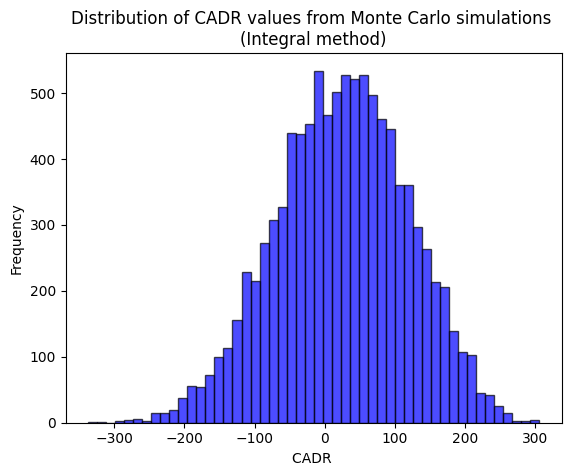

In [16]:
import numpy as np
import matplotlib.pyplot as plt


num_simulations = 10000

# Function to compute the integral
def compute_integral(t, c, c_bg):
    N = len(t)
    integral_sum = 0.0

    for i in range(1, N):

        t_diff = t[i] - t[i-1]
        c_sum = 10**c[i-1] + 10**c[i]
        integral_sum += (t_diff * c_sum) / 2

    return integral_sum

# Function to compute the CADR component for either test or control
def compute_component(t, c, c_bg):

    integral_c = compute_integral(t, c, c_bg)
    #print(integral_c)
    return (10**c[0]-10**c[-1]) / integral_c


# Original CADR value
CADR_original = V* (compute_component(t_t, c_test, c_bg_test) - compute_component(t_c, c_control, c_bg_control))

print("test",compute_component(t_t, c_test, c_bg_test))
print("control",compute_component(t_c, c_control, c_bg_control))
print(f"Original CADR value = {CADR_original}\n")

# Monte Carlo simulations
CADR_values = np.zeros(num_simulations)

for i in range(num_simulations):

#Use normal distribution just in case that input distribution is normal

    c_test_simulated = np.random.normal(c_test, sigma_test)
    c_control_simulated = np.random.normal(c_control, sigma_control)

    CADR_values[i] = V * (compute_component(t_t, c_test_simulated, c_bg_test) - compute_component(t_c, c_control_simulated, c_bg_control))

# Calculate mean and standard deviation of CADR

# Use np.isnan() to identify NaN values and create a boolean mask
#mask = ~np.isnan(CADR_values)

# Apply the mask to filter out NaN values
CADR_values=  CADR_values[mask]
CADR_mean = np.mean(CADR_values)
CADR_std = np.std(CADR_values)

# If the output distribution is heavly skewed, meaning it is not normal at all, calculate CADR amd its SD by eleminating 10% or 20% of data from both side of output distribution.
# If the output distribution in normal, no need to eleminate any data.

#CADR_mean = np.mean(CADR_values[(CADR_values > np.percentile(CADR_values, 10)) & (CADR_values < np.percentile(CADR_values, 90))])

#CADR_std = np.std(CADR_values[(CADR_values > np.percentile(CADR_values, 10)) & (CADR_values < np.percentile(CADR_values, 90))])


print(f"Mean CADR value from Monte Carlo simulations = {CADR_mean}\n")
print(f"Standard deviation of CADR value from Monte Carlo simulations = {CADR_std}\n")
print(f"Error = {CADR_std / CADR_mean * 100}%\n")

# Plotting the distribution of CADR values
plt.hist(CADR_values, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.title('Distribution of CADR values from Monte Carlo simulations \n(Integral method)')
plt.xlabel('CADR ')
plt.ylabel('Frequency')

# Disable scientific notation for x-axis and y-axis
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

# Optionally, adjust the format of the ticks
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()


###2.3. log linear error porpagation


Uncertainty prpagation for log-linear approach:

Linear regression was used to estimate the slope through the straight line using the follwoing formula:
$$
K_{\text{reg}} = - \frac{\sum_{i=1}^{n} t_i \ln\left(\frac{C(t)}{C(0)}\right)}{\sum_{i=1}^{n} t_i^2}
$$

We also know that the error of regression can be obtained using:
$$
\delta = \sqrt\frac{\sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}{(n-1) \sum_{i=1}^{n} x_i^2}
$$

Based on the aformentioned formula, the regression error in the resulting loss rate is thus


$$
\delta K_{\text{reg}} = \sqrt\frac{\sum_{i=1}^{n} \left( \ln\left(\frac{C(t_i)}{C(0)}\right) - t_i \frac{\sum_{i=0}^{n} t_i \ln\left(\frac{C(t)}{C(0)}\right)}{\sum_{i=1}^{n} t_i^2} \right)^2}{(n-1) \sum_{i=1}^{n} t_i^2}
$$

By applying MC method on both $K_{\text{reg}}$ and $\delta K_{\text{reg}}$ we obtain:


$$
K_{\text{reg}}=\bar{K}_{\text{reg}} \pm \sigma_{K_{\text{reg}}}
$$
$$
 \delta K_{\text{reg}}= (\delta K_{\text{reg}} \pm \sigma_{\delta K_{\text{reg}}})
$$
 which can be compined as follows ang results in total error or log-linear approach

$$
K = \bar{K}_{\text{reg}} \pm \sigma_{\bar{K}_{\text{reg}}} \bar{\pm (\delta K_{\text{reg}}} \bar{\pm \sigma_{\delta K_{\text{reg}}}})
$$


In the following code, we call $\bar{K_{\text{reg}}}$ as K1 and  $\bar{\delta K_{\text{reg}}}$ as K2:

Mean k1 value for test from Monte Carlo simulations = 0.06399588061707079

Standard deviation of k1 value for test from Monte Carlo simulations = 0.00927263123476958

Mean k1 value for control from Monte Carlo simulations = 0.05251179736363529

Standard deviation of k1 value for control from Monte Carlo simulations = 0.008658825863722706

Mean k2 value for test from Monte Carlo simulations = 0.00814069239922525

Standard deviation of k2 value for test from Monte Carlo simulations = 0.0027395153349879177

Mean k2 value for control from Monte Carlo simulations = 0.006953418513919255

Standard deviation of k2 value for control from Monte Carlo simulations = 0.0024550229705957625

overall error for kt 0.020152838968982748
overall error for kc 0.01806726734823772
Overall uncertainty for log-linear 81.19770693487605


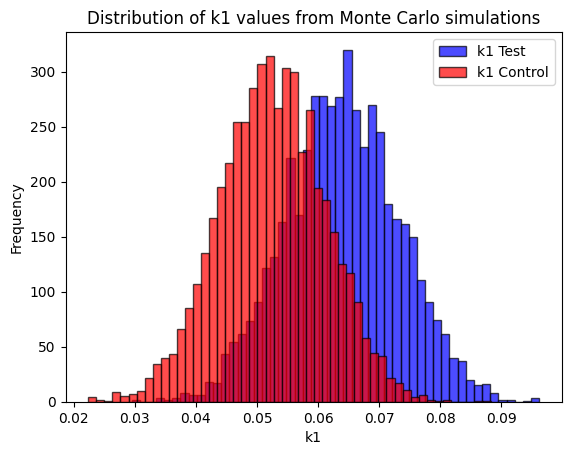

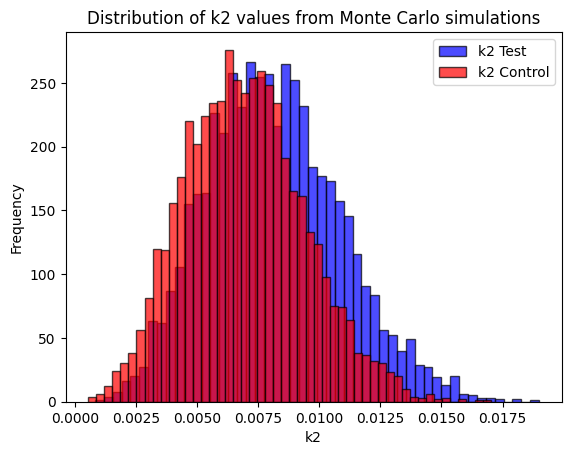

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
num_simulations = 5000

# Define the compute_k1 function using the first part of the new formula
def compute_k1(t, c,c_bg):
    ln_c_ratio = -np.log((10**c-c_bg) / (10**c[0]-c_bg))
    numerator = np.sum(t * ln_c_ratio)
    denominator = np.sum(t ** 2)
    return numerator / denominator

# Define the compute_k2 function using the second part of the new formula
def compute_k2(t, c, k,c_bg, alpha=0.05):
    ln_c_ratio = -np.log((10**c-c_bg) / (10**c[0]-c_bg))

    # Calculate the mean of the time points
    t_mean = np.mean(t)

    # Calculate the second term
    residual_sum = np.sum(((ln_c_ratio - k * t)) ** 2)
    #print( k)
    critical_value = stats.t.ppf(1- alpha / 2, len(t) - 1)
    #second_term = critical_value * np.sqrt(residual_sum / ((len(t) - 1) * np.sum((t) ** 2)))
    second_term = np.sqrt(residual_sum / ((len(t) - 1) * np.sum((t) ** 2)))
    return second_term


# Monte Carlo simulations for the first formula


k1_values_test = np.zeros(num_simulations)
k1_values_control = np.zeros(num_simulations)

for i in range(num_simulations):
    c_test_simulated = np.random.normal(c_test, sigma_test )
    c_control_simulated = np.random.normal(c_control, sigma_control)

    k1_values_test[i] = compute_k1(t_t, c_test_simulated,c_bg_test)
    k1_values_control[i] = compute_k1(t_c, c_control_simulated, c_bg_control)

# Monte Carlo simulations for the second formula
k2_values_test = np.zeros(num_simulations)
k2_values_control = np.zeros(num_simulations)

for i in range(num_simulations):
    c_test_simulated = np.random.normal(c_test, sigma_test )
    c_control_simulated = np.random.normal(c_control, sigma_control)

    k_test = compute_k1(t_t, c_test_simulated, c_bg_test)
    k_control = compute_k1(t_c, c_control_simulated, c_bg_control)
    k2_values_test[i] = compute_k2(t_t, c_test_simulated, k_test, c_bg_test)
    k2_values_control[i] = compute_k2(t_c, c_control_simulated, k_control, c_bg_control)

# Calculate mean and standard deviation for both formulas
k1_mean_test = np.mean(k1_values_test)
k1_std_test = np.std(k1_values_test)
k1_mean_control = np.mean(k1_values_control)
k1_std_control = np.std(k1_values_control)

k2_mean_test = np.mean(k2_values_test)
k2_std_test = np.std(k2_values_test)
k2_mean_control = np.mean(k2_values_control)
k2_std_control = np.std(k2_values_control)

print(f"Mean k1 value for test from Monte Carlo simulations = {k1_mean_test}\n")
print(f"Standard deviation of k1 value for test from Monte Carlo simulations = {k1_std_test}\n")
print(f"Mean k1 value for control from Monte Carlo simulations = {k1_mean_control}\n")
print(f"Standard deviation of k1 value for control from Monte Carlo simulations = {k1_std_control}\n")

print(f"Mean k2 value for test from Monte Carlo simulations = {k2_mean_test}\n")
print(f"Standard deviation of k2 value for test from Monte Carlo simulations = {k2_std_test}\n")
print(f"Mean k2 value for control from Monte Carlo simulations = {k2_mean_control}\n")
print(f"Standard deviation of k2 value for control from Monte Carlo simulations = {k2_std_control}\n")

print("overall error for kt", k1_std_test+k2_mean_test+k2_std_test)
print("overall error for kc", k1_std_control+k2_mean_control+k2_std_control)
print("Overall uncertainty for log-linear", V*np.sqrt((k1_std_test+k2_mean_test+k2_std_test)**2+(k1_std_control+k2_mean_control+k2_std_control)**2))
# Plotting the distribution of k1 values
plt.hist(k1_values_test, bins=50, alpha=0.7, color='b', edgecolor='black', label='k1 Test')
plt.hist(k1_values_control, bins=50, alpha=0.7, color='r', edgecolor='black', label='k1 Control')
plt.title('Distribution of k1 values from Monte Carlo simulations')
plt.xlabel('k1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plotting the distribution of k2 values
plt.hist(k2_values_test, bins=50, alpha=0.7, color='b', edgecolor='black', label='k2 Test')
plt.hist(k2_values_control, bins=50, alpha=0.7, color='r', edgecolor='black', label='k2 Control')
plt.title('Distribution of k2 values from Monte Carlo simulations')
plt.xlabel('k2')
plt.ylabel('Frequency')
plt.legend()
plt.show()
